### 목표 
 - 0~9까지 손글씨 이미지 데이터를 활용하여 분류하는 신경망 모델을 만들어보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras에서 지원하는 딥러닝 학습용 손글씨 데이터
from tensorflow.keras.datasets import mnist

In [2]:
data = mnist.load_data()
data
# npz 이미지 데이터를 용량을 덜어서 저장하기 위해 넘파이 배열 압축 형식으로 저장

11501568/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
# data 크기
len(data) 

2

In [6]:
len(data[0]) # 2개
# data[0] - train 임
# data[1] - test 임

# data[0][0] - X_train 이미지 데이터들 이됨
# data[0][1] - y_train 실제 숫자답 이됨
# data[1][0] - X_test
# data[1][1] - y_test 

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

#### 데이터 정리

In [11]:
# 데이터 형식 
a,b = ('a','b') 
print(a,b)
#라는 파이썬 형식임 
(X_train_te,y_train_te),(X_test_te,y_test_te)= (('X_train','y_train'),('X_test','y_test'))
X_train_te
# X_train 이 X_train_te에 담기게 됨

a b


'X_train'

In [9]:
(X_train,y_train ),(X_test,y_test) = data #으로 되어 있음 
#X_train = data[0][0]
#y_train = data[0][1]
#X_test = data[1][0]
#y_test = data[1][1]
print('훈련용 문제 : ', X_train.shape)
print('훈련용 답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 답 : ', y_test.shape)

# 28*28 (784) = 특성 개수
# 60000장 이미지, 28*28 - 훈련 셋
# 10000장 이미지, 28*28 - 테스트 셋 
# 이미지 2차원 데이터(행과 열을 가지고 있는 데이터가 2차원 데이터임) -> 시퀀셜에는 1차원만 들어갈 수 있음

훈련용 문제 :  (60000, 28, 28)
훈련용 답 :  (60000,)
테스트용 문제 :  (10000, 28, 28)
테스트용 답 :  (10000,)


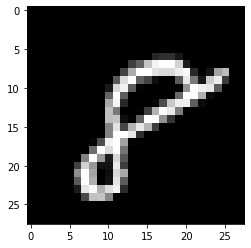

In [12]:
# 이미지화 출력
plt.imshow(X_train[59999], cmap = 'gray')
plt.show()

#### 정답 데이터 원핫인코딩
 - 1. 클래스 레이블 값이 3개 이상일 경우 기계가 이해하기 위해 0또는 1의 형태로 변경해야함 그래서 원핫인코딩해야함
 - 2. 신경망 출력층에서 각 레이블 값들에 대한 확률 정보를 출력하기 위해서
 - pandas : pd.get_dummies() <- 원핫인코딩 생성
 - keras : to_categorical() <- 원핫인코딩 생성

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
# y_train, y_test를 원핫 인코딩 하기
y_train_oh = to_categorical(y_train) 
y_test_oh = to_categorical(y_test)
print(y_train_oh.shape)
print(y_test_oh.shape)

(60000, 10)
(10000, 10)


In [16]:
y_train_oh[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### 이미지 크기 변경
 - 2차원 -> 1차원

In [17]:
X_train = X_train.reshape(60000,-1) # X_train.reshape(28*28)
X_test = X_test.reshape(10000,-1)
print(X_train.shape)
print(X_test.shape)

# 이미지는 픽셀 하나하나가 하나의 특성으로 인식!
# 이미지 한장에는 784개의 특성이 있음

(60000, 784)
(10000, 784)


#### 신경망 구조를 설계해보자!


In [35]:
# 입력되는 특성의 수
# 출력층 활성화함수
# 출력층 유닛수
# 최적화 adam

# 1. 신경망 구조
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential() # 틀을 만듬

# 입력층(input_dim) + 중간층(Dense(units))
# input_dim : 특성(입력) 개수 만큼
# activation : 활성화 함수는 Dense 함수 안의 매개변수 값으로 지정
model.add(Dense(units = 600, input_dim = 784, activation='sigmoid')) # 들어올 수 있는 데이터 층
#Dense = 뉴런층(200개)

# 중간층
model.add(Dense(units = 300, activation = 'sigmoid')) # 층을 쌓음 add(Dense(units=100)) 100개
model.add(Dense(units = 50, activation = 'sigmoid')) #50개를 쌓음

# 출력층 -> y_train의 크기 개수만큼 해야댐
# 출력층 10개 의미 : 클레스 레이블 개수만큼 해야댐
model.add(Dense(units = 10, activation='softmax')) 

# 모델 정보
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 600)               471000    
                                                                 
 dense_45 (Dense)            (None, 300)               180300    
                                                                 
 dense_46 (Dense)            (None, 50)                15050     
                                                                 
 dense_47 (Dense)            (None, 10)                510       
                                                                 
Total params: 666,860
Trainable params: 666,860
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 2. 학습/방법 설정
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', # 최적화 함수 : 확률적 경사하강법
              metrics = ['accuracy']) #평가방법 설정(metrics) : 정확도
# 3. 학습
h = model.fit(X_train, y_train_oh, epochs = 50 verbose = 1 )
# verbose : 학습 결과의 출력 형태를 설정하는 명령
# (0 : 출력 x , 1: bar 형태로 출력)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1336 - accuracy: 0.9574
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1241 - accuracy: 0.9604
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1243 - accuracy: 0.9596
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1218 - accuracy: 0.9615
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1217 - accuracy: 0.9617
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1203 - accuracy: 0.9619
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1138 - accuracy: 0.9638
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1104 - accuracy: 0.9647
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9663
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.105

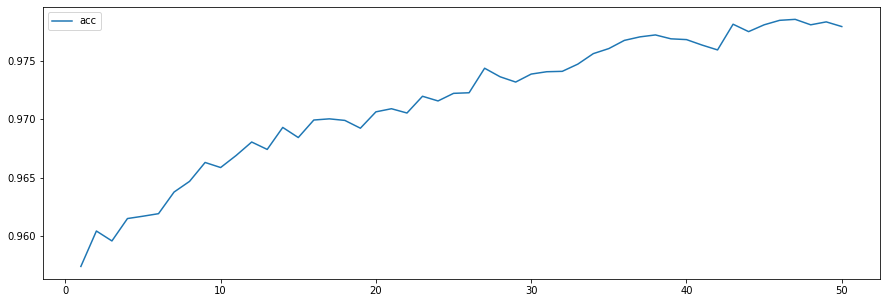

In [38]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(range(1,51),
         h.history['accuracy'],
         label='acc')
plt.legend()
plt.show()

#### 과대적합을 확인하기 위해서 train데이터에서 검증셋을 분리해서 학습에 적용

In [40]:
# 무조건 train.test로 분리해주는 것이 아니라
# 검증용 셋이 필요하다면 용량이 많은 train 쪽에서 분리하여 활용
from sklearn.model_selection import train_test_split

In [41]:
# 분리될 데이터 : X_train, y_train_oh
X_train,X_val,y_train_oh,y_val_oh = train_test_split(X_train,
                                                     y_train_oh,
                                                     test_size = 0.2,
                                                     random_state=3
                                                     )
# 크기확인
print('훈련용문제 : ', X_train.shape)
print('훈련용답 : ', y_train_oh.shape)
print('검증용문제 : ', X_val.shape) # val = 검증
print('검증용답 : ', y_val_oh.shape)
# 검증용 데이터는 학습할 때 같이 적용

훈련용문제 :  (48000, 784)
훈련용답 :  (48000, 10)
검증용문제 :  (12000, 784)
검증용답 :  (12000, 10)


#### 신경망 모델 설계

In [42]:
#신경망 틀
model2 = Sequential()
#입력층
model2.add(Dense(600, input_dim=784, activation='sigmoid'))
#중간층
model2.add(Dense(300, activation = 'sigmoid'))
model2.add(Dense(50, activation = 'sigmoid'))
# 출력층
model2.add(Dense(10, activation = 'softmax'))
#Softmax(소프트맥스)는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수
#분류하고 싶은 클래수의 수 만큼 출력으로 구성한다.
#가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용된다.

In [43]:
model2.compile(loss='categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [44]:
h2 = model2.fit(X_train, y_train_oh,
                epochs=30,
                validation_data=(X_val,y_val_oh)) # 검증용셋 추가

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5134 - accuracy: 0.8636 - val_loss: 0.3120 - val_accuracy: 0.9055
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3037 - accuracy: 0.9068 - val_loss: 0.3121 - val_accuracy: 0.8978
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2725 - accuracy: 0.9141 - val_loss: 0.2714 - val_accuracy: 0.9167
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2478 - accuracy: 0.9229 - val_loss: 0.2193 - val_accuracy: 0.9305
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2125 - accuracy: 0.9337 - val_loss: 0.2108 - val_accuracy: 0.9338
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2033 - accuracy: 0.9365 - val_loss: 0.1974 - val_accuracy: 0.9385
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1903 - accuracy: 0.9397 - val_loss: 0.2023 - val_accuracy:

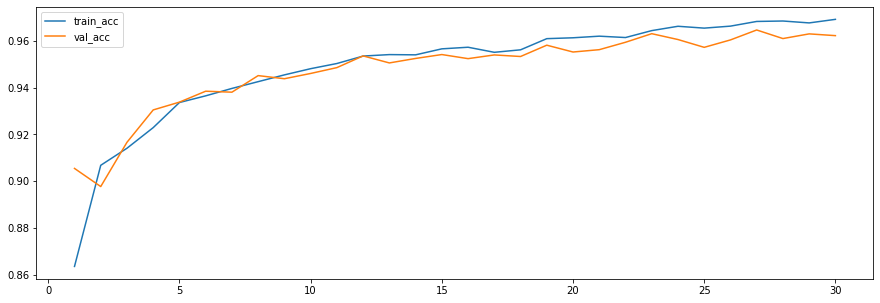

In [45]:
# 시각화
plt.figure(figsize=(15,5))
# train plot
plt.plot(range(1,31),
         h2.history['accuracy'], # h2 = 검증용 model2를 가지고있음
         label = 'train_acc')

# val plot (검증)
plt.plot(range(1,31),
         h2.history['val_accuracy'],
         label = 'val_acc')

plt.legend()
plt.show()

In [46]:
# 평가 
model2.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.1258 - accuracy: 0.9597


[0.12584993243217468, 0.9596999883651733]